In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [5]:
def synthetic_data(w, b, num_examples): #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [6]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.4832,  0.7570]) 
label: tensor([0.6589])


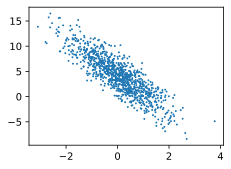

In [7]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [8]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)]
        )
        # 在每次迭代中，从打乱后的indices列表中选择连续的batch_size个索引，如果i + batch_size超过了num_examples的范围，则只取到num_examples为止。然后，这些索引被转换成torch.tensor类型，以便可以用于PyTorch的张量操作。
        yield features[batch_indices], labels[batch_indices]

In [9]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.0585,  0.8506],
        [-1.3127,  0.1380],
        [-1.4972, -2.7556],
        [-1.3669, -0.2255],
        [-1.4338,  0.1017],
        [-1.1710, -1.7520],
        [ 0.4475, -0.3368],
        [ 0.7579,  0.4102],
        [ 0.7397,  1.4170],
        [ 1.2155, -0.4795]]) 
 tensor([[-0.8078],
        [ 1.1239],
        [10.5775],
        [ 2.2125],
        [ 0.9819],
        [ 7.8082],
        [ 6.2355],
        [ 4.3115],
        [ 0.8716],
        [ 8.2574]])


In [10]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [11]:
def linreg(X, w, b): #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

In [12]:
def squared_loss(y_hat, y): #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [13]:
def sgd(params, lr, batch_size): #@save
    """小批量随机梯度下降"""
    with torch.no_grad(): # 关闭自动梯度计算
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [14]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)   # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size) # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}') # :f是一个格式化指令，表示以浮点数格式输出，这通常意味着输出一个十进制的小数。

epoch 1, loss 0.041518
epoch 2, loss 0.000176
epoch 3, loss 0.000050


In [15]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 5.9247e-05, -1.0297e-03], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0004], grad_fn=<RsubBackward1>)


In [16]:
w, b

(tensor([[ 1.9999],
         [-3.3990]], requires_grad=True),
 tensor([4.1996], requires_grad=True))